0.0, 0.0
0.9999981444554141, -0.0016666938033572548
1.9999851756046259, -0.006667088505202973
2.999949976640769, -0.01500207030278514
3.9998813966915576, -0.026672994928832933
4.9997683044943635, -0.04168157146262709
5.999599492347423, -0.060029736964509486
6.999363768123162, -0.08171952499250344
7.999049907276157, -0.10675292656071564
8.998646667902532, -0.13513174918851423
9.998142840050203, -0.16685747292747083
10.997527098222218, -0.20193110581991408
11.996788229284697, -0.2403530400174686
12.995915012635109, -0.28212290983944344
13.994896267356786, -0.3272394529554036
14.99372087040947, -0.3757003757826941
15.992377776805002, -0.4275022248234911
16.990856041601837, -0.4826402589028981
17.989144843531015, -0.5411083444560008
18.98723358256897, -0.6028988309338785
19.985111627870317, -0.6680024657898382
20.9827687459385, -0.7364082878274095
21.980194871566717, -0.8081035593795061
22.977380198082805, -0.8830736863416522
23.974315205947146, -0.9613021578824956
24.97099069127946, -1.04

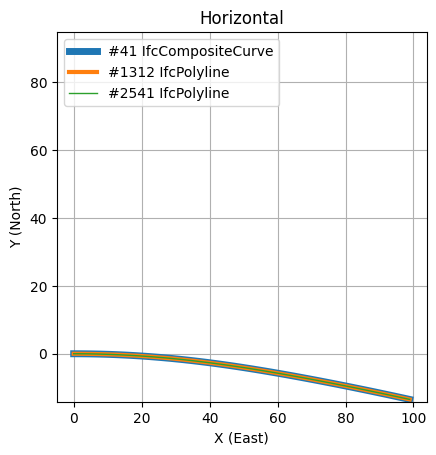

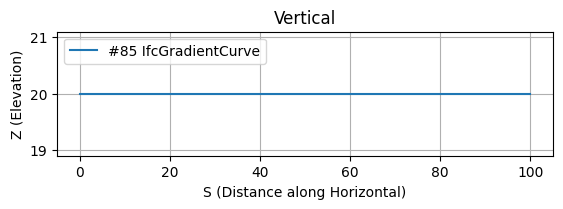

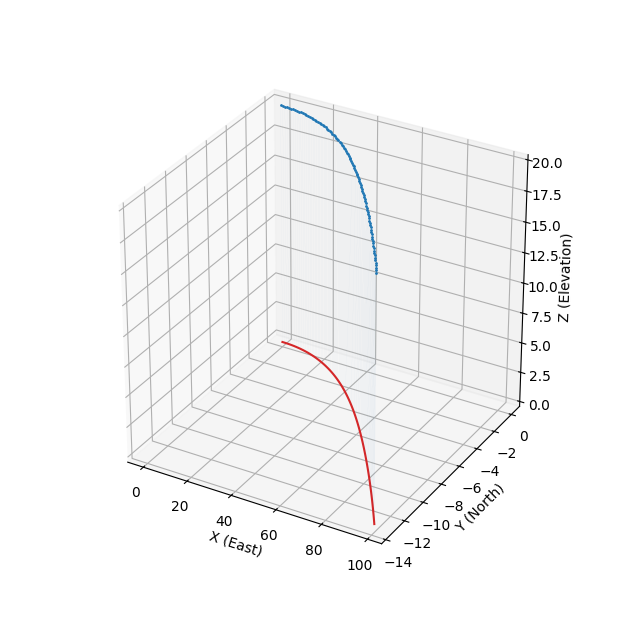

In [1]:
import ifcopenshell
import ifcopenshell.geom as geom
import ifcopenshell.ifcopenshell_wrapper as wrapper
import numpy as np
import matplotlib.pyplot as plt
import math
import ifcopenshell.api.alignment

model = ifcopenshell.open("C:\\Users\\bricer\\OneDrive - Washington State Department of Transportation\\BIM Fit Check\\VienneseBend\\ifcfiles\\horizontal_vertical_check\\VienneseBend_TS8_horizontal_vertical_check.ifc")

settings = geom.settings()
settings.set("FUNCTION_STEP_TYPE",0) # 0 = maximum step size method, 1 = min number of steps method
settings.set("FUNCTION_STEP_PARAM",1.0) # maximum step size or min number of steps

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig3 = plt.figure(figsize=(8,8)).add_subplot(projection="3d")

lw = 5

hcurves = model.by_type("IfcCompositeCurve",False)
for hc in hcurves:
    shape = geom.create_shape(settings,hc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    fig1.plot(x,y,linewidth=lw,label="#" + str(hc.id())+" "+hc.is_a())
    lw -= 2
    for a,b in zip(x,y):
        print(f"{a}, {b}")

polylines = model.by_type("IfcPolyline")
for polyline in polylines:
    shape = geom.create_shape(settings,polyline)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    dir(polyline)
    fig1.plot(x,y,linewidth=lw,label="#" + str(polyline.id()) + " " + polyline.is_a())
    lw -= 2


curves = model.by_type("IfcGradientCurve",False)
for gc in curves:
    gradient_curve = ifcopenshell.ifcopenshell_wrapper.map_shape(settings,gc.wrapped_data)
    evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(settings,gradient_curve)
    distances = evaluator.evaluation_points()
    
    shape = geom.create_shape(settings,gc)
    verts = shape.verts
    verts = np.array(verts).reshape((-1,3))
    x,y,z = verts.T
    
    #fig1.plot(x,y,label="#" + str(gc.id()))
    fig2.plot(distances,z,label="#" + str(gc.id()) + " " + gc.is_a())
    
    markerline, stemline, baseline = fig3.stem(x,y,z)
    plt.setp(stemline,linewidth=0.01)
    plt.setp(stemline,linestyles="dashed")
    plt.setp(markerline,markersize=1)


fig1.set_title("Horizontal")
fig1.legend(loc="upper left")
fig1.axis("square")
fig1.set_aspect('equal',adjustable='box')
fig1.set_xlabel("X (East)")
fig1.set_ylabel("Y (North)")
fig1.grid(True)

fig2.set_title("Vertical")
fig2.legend(loc="upper left")
fig2.set_xlabel("S (Distance along Horizontal)")
fig2.set_ylabel("Z (Elevation)")
fig2.set_box_aspect(0.25)
fig2.grid(True)

#fig3.set_title("IfcGradientCurve")
#fig3.legend()
#fig3.axis("square")
fig3.set_xlabel("X (East)")
fig3.set_ylabel("Y (North)")
fig3.set_zlabel("Z (Elevation)")
fig3.grid(True)
fig3.set_box_aspect([1,1,1],zoom=0.8)
#fig3.set_box_aspect(aspect=None,zoom=0.8)

#plt.savefig("Alignment.png")
plt.show()
